# 오버워치 2 점수판 분석 AI (역할 미구분)

In [1]:
import pandas as pd
from os import path
import joblib

players = 10


def prepare_scoreboards(defeat_, victory_):
    scoreboards_ = pd.concat([defeat_, victory_])
    scoreboards_.set_index(
        pd.Index((i, j) for i in range(len(scoreboards_._1) // players) for j in range(players)), inplace=True
    )
    return scoreboards_


datapath = path.join('datasets', '')
range_ = range(3, 10)
defeat = pd.read_csv(datapath + 'role_defeat.csv', usecols=range_)
victory = pd.read_csv(datapath + 'role_victory.csv', usecols=range_)
scoreboards = prepare_scoreboards(defeat, victory)
d_max = scoreboards['D'].max()
joblib.dump(d_max, 'max.joblib')
scoreboards.loc[
    (
            scoreboards['E'] == 0
    ) & (
            scoreboards['A'] == 0
    ) & (
            scoreboards['D'] == 0
    ) & (
            scoreboards['DMG'] == 0
    ) & (
            scoreboards['H'] == 0
    ) & (
            scoreboards['MIT'] == 0
    ), 'D'
] = d_max
scoreboards

E   A   D    DMG     H    MIT    GAME
0   0  24   9   5   9021     0  10517  DEFEAT
    1  17   0  11   7114     0    406  DEFEAT
    2  19   9   8   5749  1336   1266  DEFEAT
    3   7  17  11   1260  8133    237  DEFEAT
    4   9  17  10   1862  8773    113  DEFEAT
...    ..  ..  ..    ...   ...    ...     ...
798 5  21   3  12  11310     0  13374  DEFEAT
    6  17   0  14   8589     0      0  DEFEAT
    7  15   3  10   6323    75     17  DEFEAT
    8   8  12  13   4034  4996    289  DEFEAT
    9   3   1   1    406   186      0  DEFEAT

[7990 rows x 7 columns]

In [2]:
scoreboards.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 7990 entries, (0, 0) to (798, 9)
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   E       7990 non-null   int64 
 1   A       7990 non-null   int64 
 2   D       7990 non-null   int64 
 3   DMG     7990 non-null   int64 
 4   H       7990 non-null   int64 
 5   MIT     7990 non-null   int64 
 6   GAME    7990 non-null   object
dtypes: int64(6), object(1)
memory usage: 499.3+ KB


In [3]:
scoreboards.describe()

,E,A,D,DMG,H,MIT
count,7990.000000,7990.000000,7990.000000,7990.000000,7990.000000,7990.000000
mean,14.405757,7.389612,6.544806,6718.879099,3825.857322,2270.040926
std,9.343225,8.142877,3.789813,4439.979763,5006.172586,4400.732381
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,1.000000,4.000000,3212.250000,0.000000,0.000000
50%,13.000000,4.000000,6.000000,6088.000000,700.000000,369.000000
75%,20.000000,12.000000,9.000000,9586.000000,7325.500000,1896.250000
max,58.000000,62.000000,23.000000,29922.000000,26419.000000,41849.000000


In [4]:
import matplotlib as mpl
import os
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
IMAGES_PATH = path.join('.', 'images')
os.makedirs(IMAGES_PATH, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + '.' + fig_extension)
    print('그림 저장:' + fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, dpi=resolution, format=fig_extension)

In [5]:
scoreboards

E   A   D    DMG     H    MIT    GAME
0   0  24   9   5   9021     0  10517  DEFEAT
    1  17   0  11   7114     0    406  DEFEAT
    2  19   9   8   5749  1336   1266  DEFEAT
    3   7  17  11   1260  8133    237  DEFEAT
    4   9  17  10   1862  8773    113  DEFEAT
...    ..  ..  ..    ...   ...    ...     ...
798 5  21   3  12  11310     0  13374  DEFEAT
    6  17   0  14   8589     0      0  DEFEAT
    7  15   3  10   6323    75     17  DEFEAT
    8   8  12  13   4034  4996    289  DEFEAT
    9   3   1   1    406   186      0  DEFEAT

[7990 rows x 7 columns]

In [6]:
tank = pd.concat([scoreboards[::players], scoreboards[5::players]])
damage = pd.concat([scoreboards[1::players], scoreboards[2::players], scoreboards[6::players], scoreboards[7::players]])
support = pd.concat(
    [scoreboards[3::players], scoreboards[4::players], scoreboards[8::players], scoreboards[9::players]]
)

In [7]:
tank.describe()

,E,A,D,DMG,H,MIT
count,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000
mean,18.145181,4.367960,6.369212,9670.199625,480.469337,9199.907384
std,9.675522,3.572984,3.681102,4242.515484,1218.764166,5778.415437
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,2.000000,4.000000,6596.250000,0.000000,5047.750000
50%,18.000000,4.000000,6.000000,9284.000000,0.000000,8098.500000
75%,24.000000,6.000000,8.000000,12375.500000,351.500000,12269.250000
max,58.000000,28.000000,23.000000,27480.000000,15168.000000,41849.000000


In [8]:
damage.describe()

,E,A,D,DMG,H,MIT
count,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000
mean,17.577910,1.940238,7.167084,8695.632979,296.884856,574.190551
std,8.995906,2.535728,4.000656,3818.515166,516.908699,1014.789600
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,0.000000,4.000000,5902.500000,0.000000,0.000000
50%,17.000000,1.000000,7.000000,8314.500000,0.000000,87.500000
75%,23.000000,3.000000,9.000000,11039.500000,413.000000,758.000000
max,56.000000,16.000000,23.000000,29922.000000,3353.000000,9682.000000


In [9]:
support.describe()

,E,A,D,DMG,H,MIT
count,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000
mean,9.363892,14.349812,6.010325,3266.464956,9027.523780,500.958073
std,6.933482,8.381829,3.527964,2350.938808,4066.400358,824.080510
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,8.000000,4.000000,1589.000000,6098.500000,0.000000
50%,8.000000,14.000000,6.000000,2891.000000,8566.000000,213.500000
75%,14.000000,19.000000,8.000000,4484.000000,11491.000000,657.250000
max,48.000000,62.000000,23.000000,15946.000000,26419.000000,7778.000000


그림 저장:tank_hist


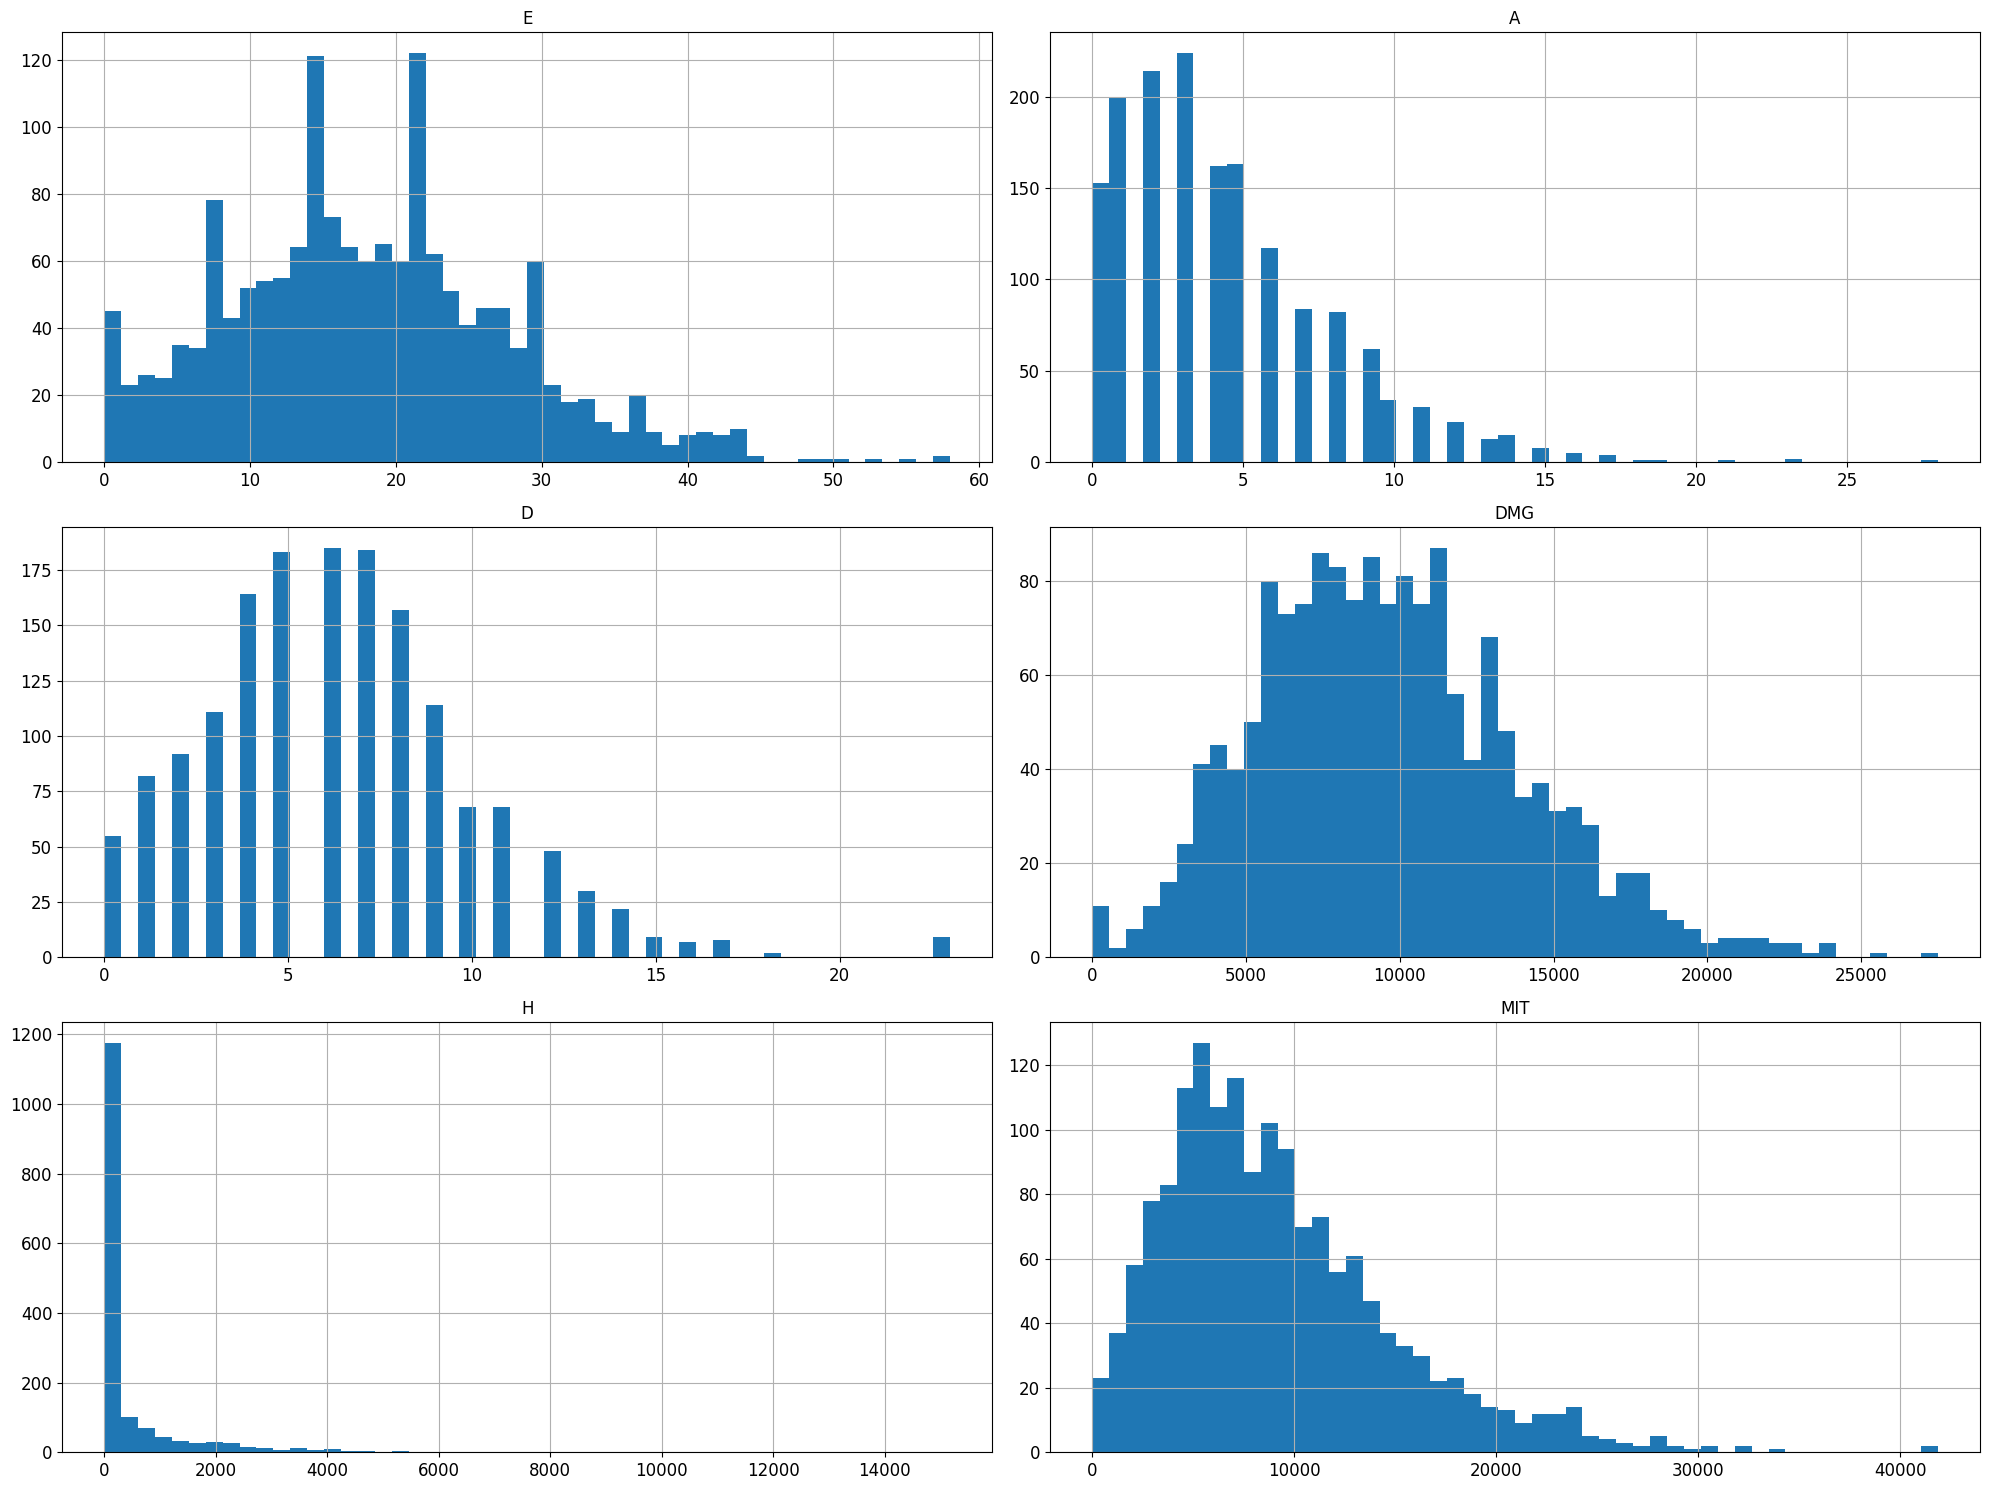

In [10]:
tank.hist(bins=50, figsize=(20, 15))
save_fig('tank_hist')
plt.show()

그림 저장:damage_hist


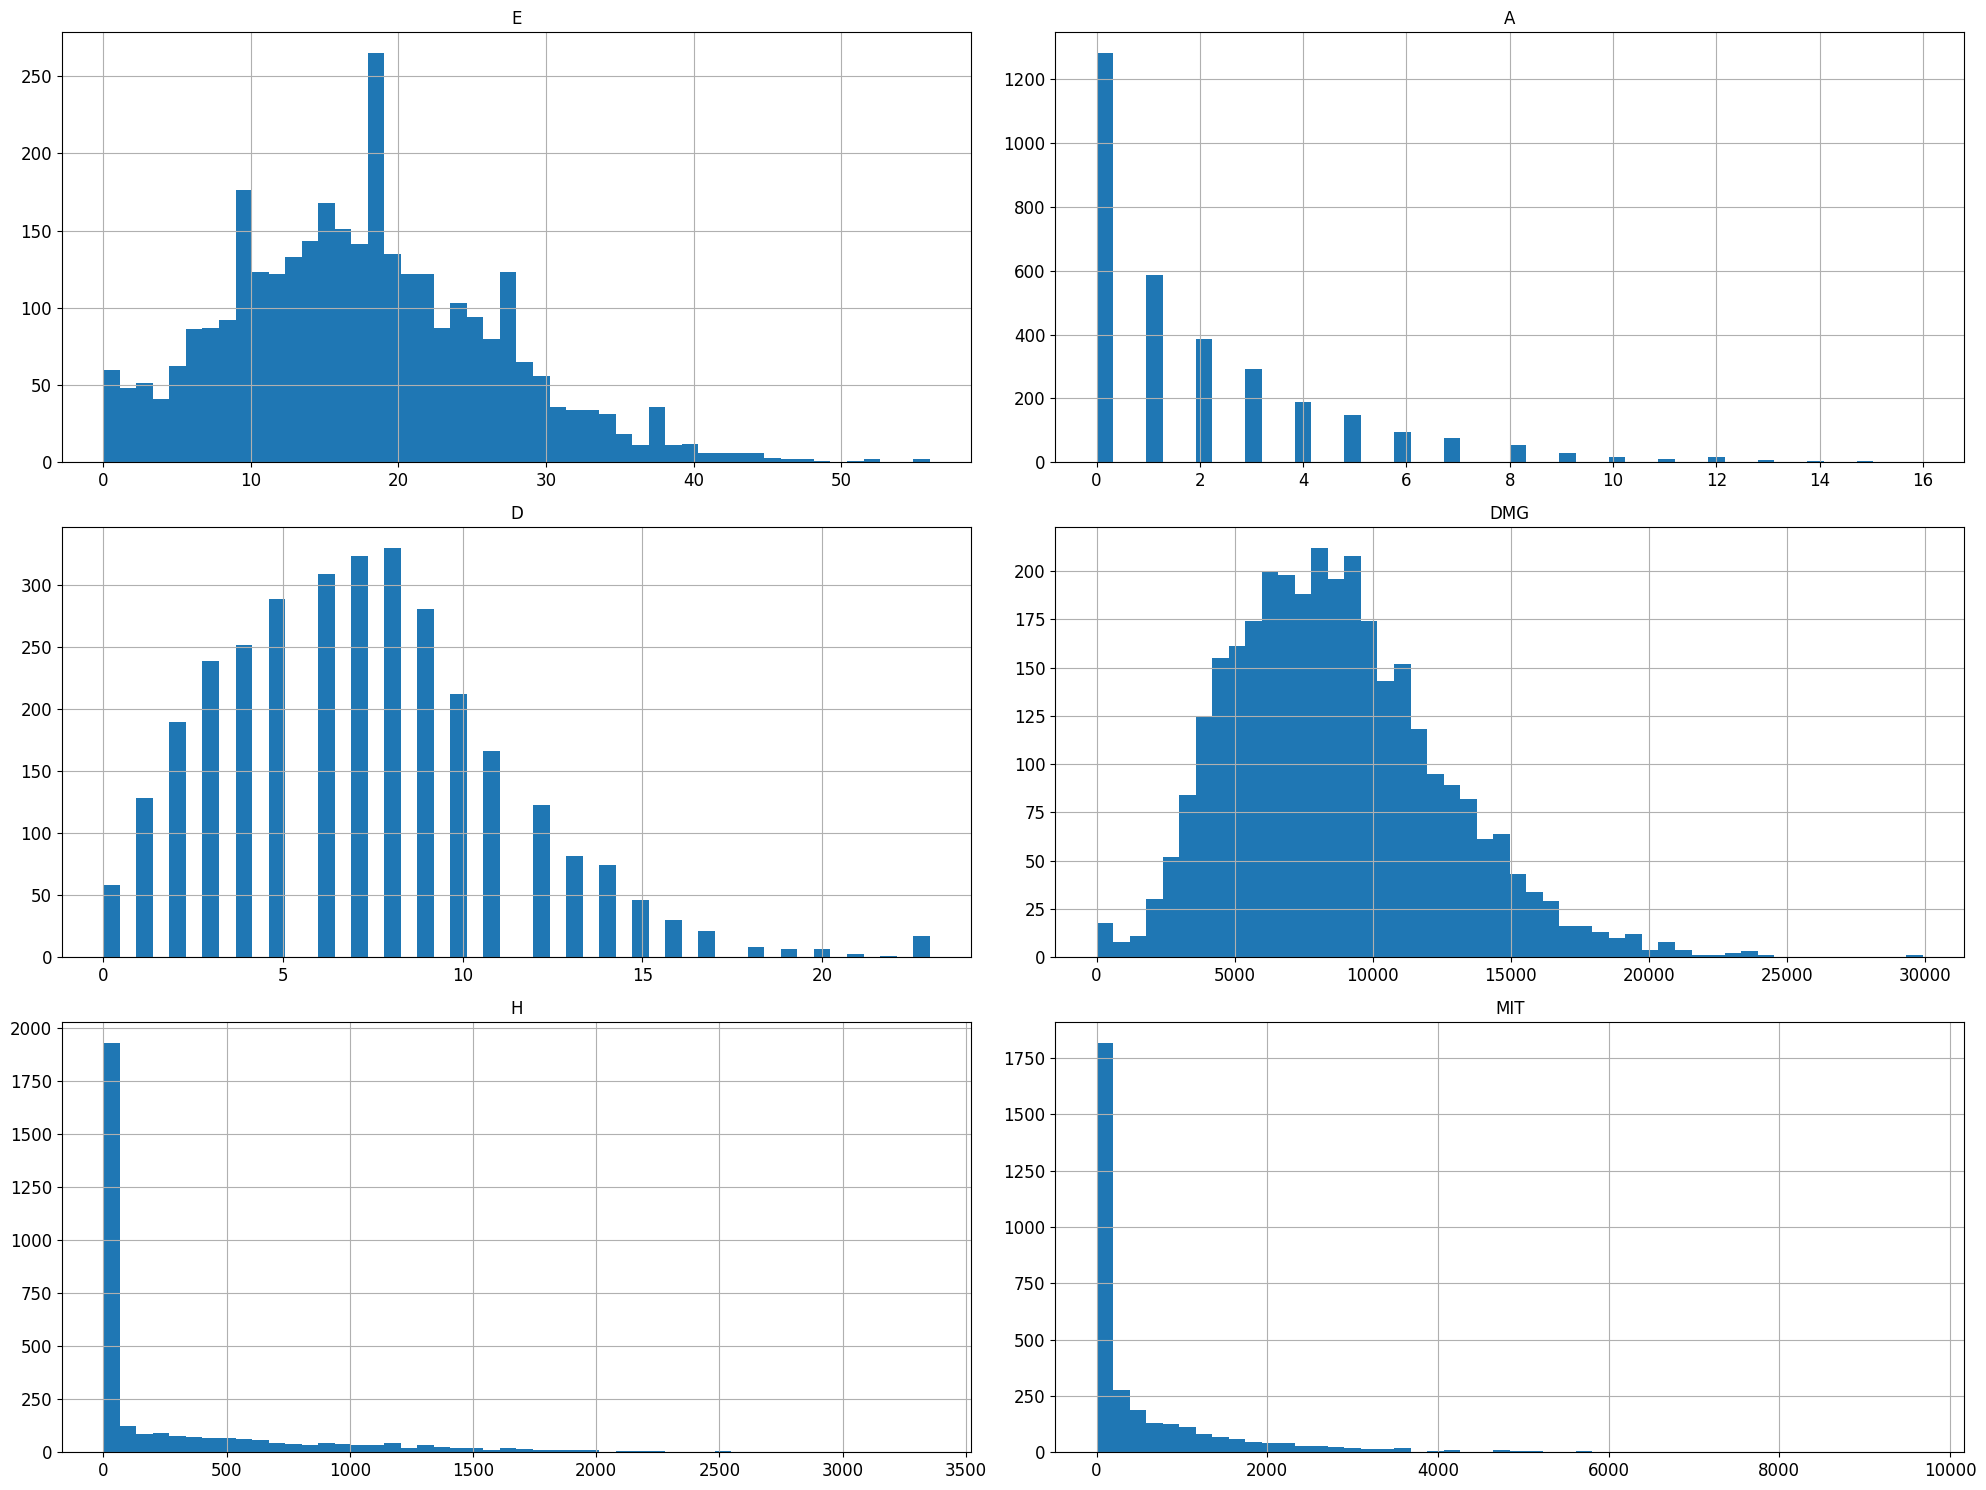

In [11]:
damage.hist(bins=50, figsize=(20, 15))
save_fig('damage_hist')
plt.show()

그림 저장:support_hist


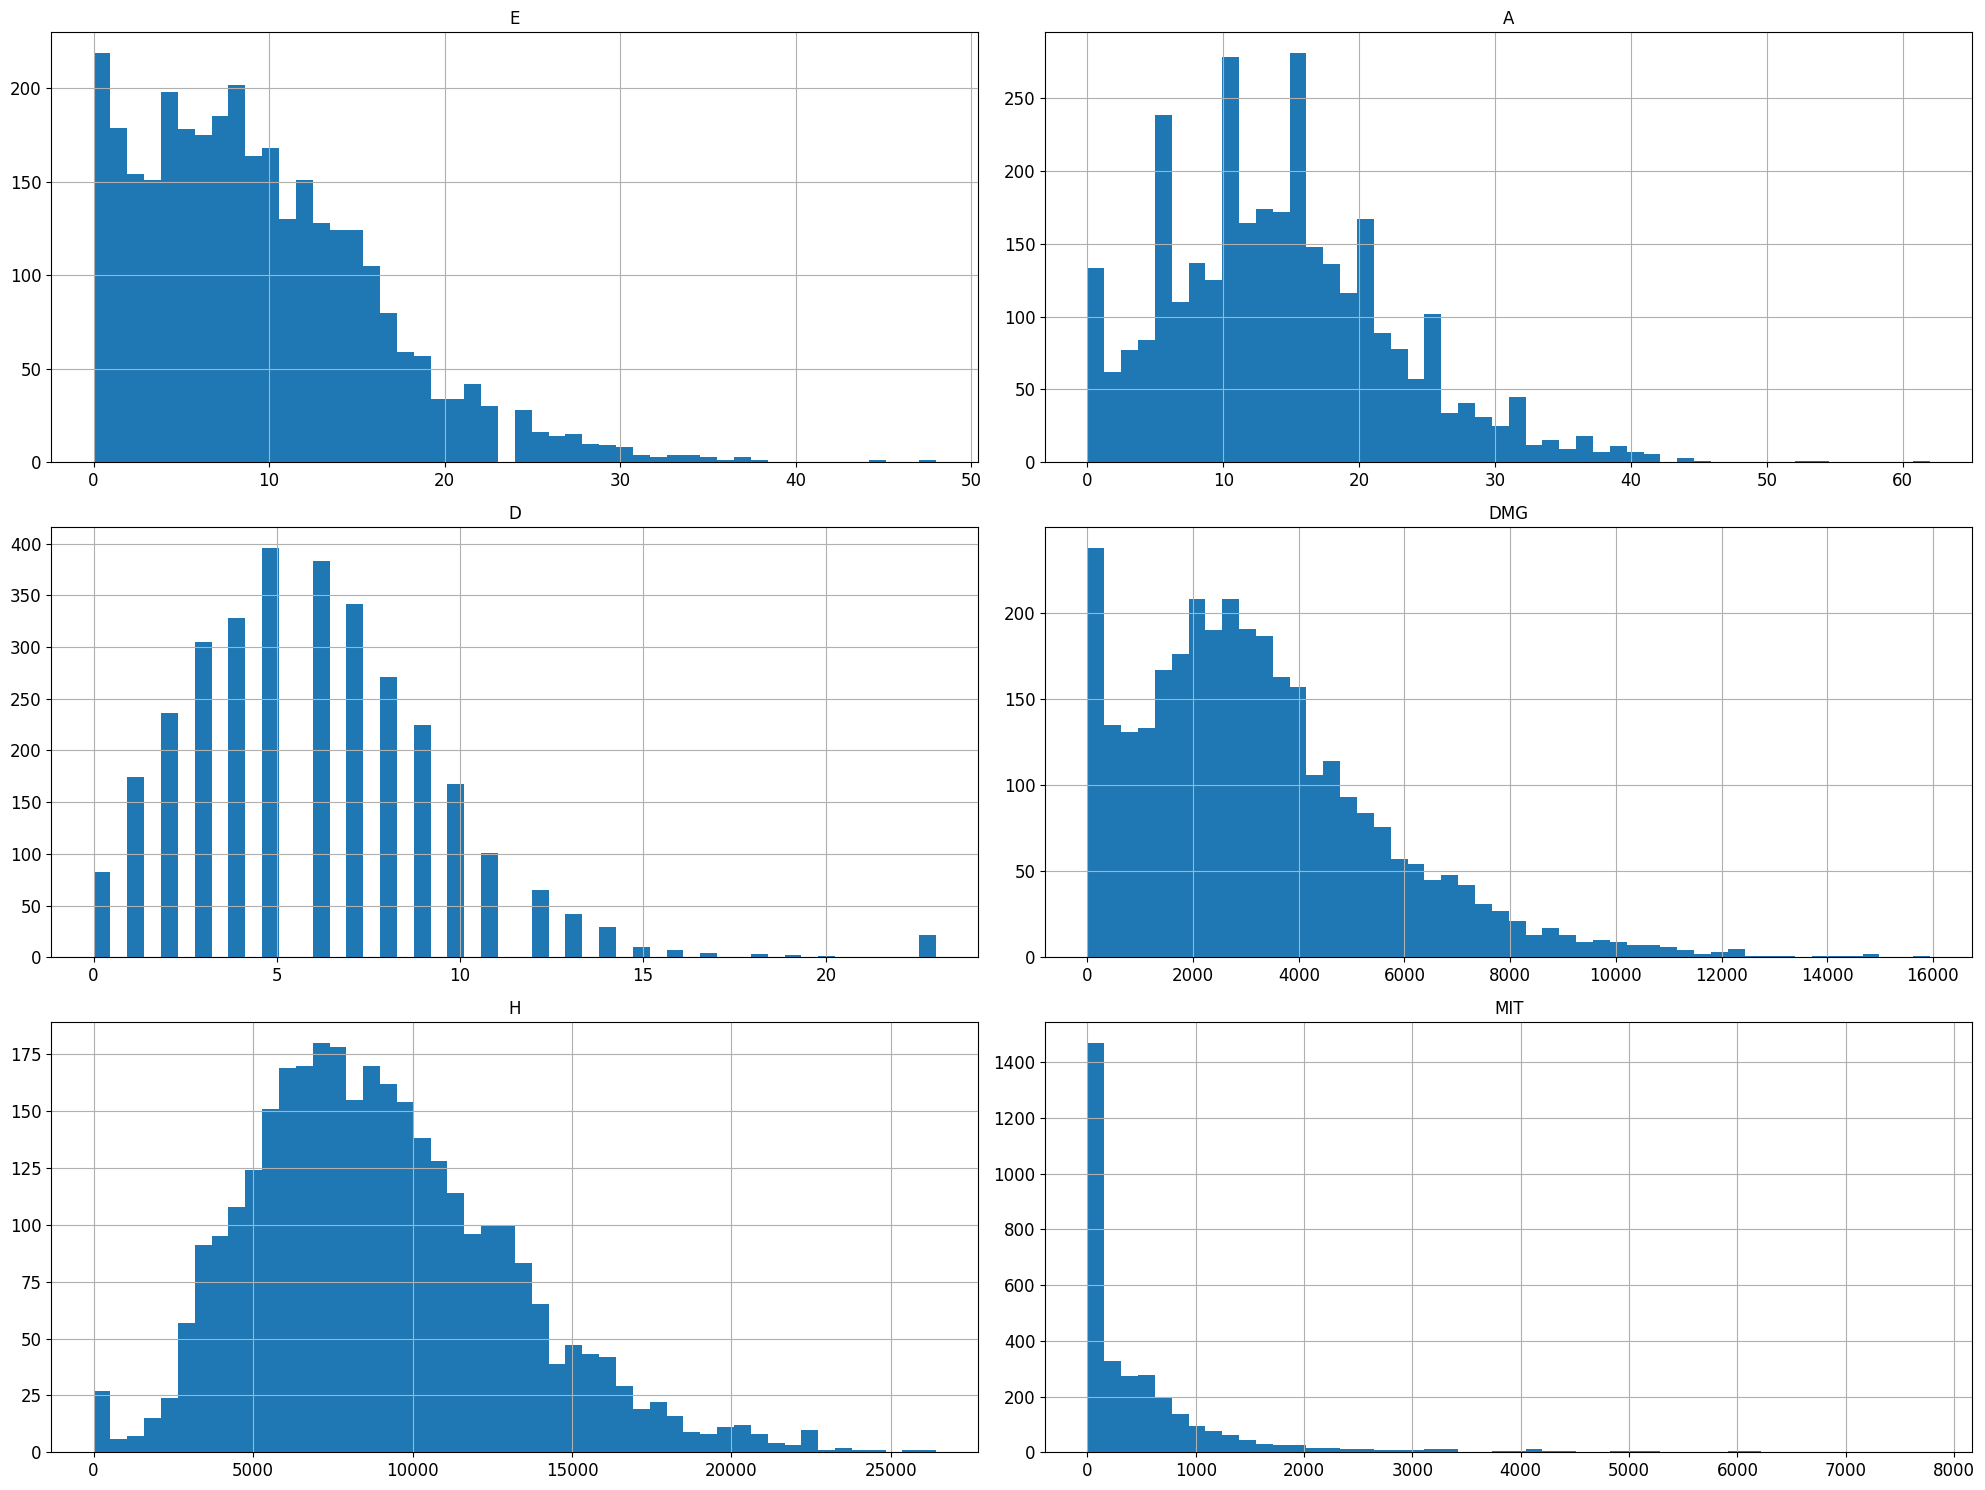

In [12]:
support.hist(bins=50, figsize=(20, 15))
save_fig('support_hist')
plt.show()

In [13]:
from sklearn import utils

scoreboards = scoreboards.loc[utils.shuffle(range(len(scoreboards._1) // players))]
scoreboards

E   A  D    DMG      H    MIT     GAME
716 0  36  10  0  13031      0  12571  VICTORY
    1  23   0  3   7562      0      0  VICTORY
    2  20   0  5  10619      0     23  VICTORY
    3   5  28  4   1221  12515      0  VICTORY
    4   6  17  3   2663   9669    634  VICTORY
...    ..  .. ..    ...    ...    ...      ...
152 5  24   6  1   6892      0   8069  VICTORY
    6  15   1  1   5795     56   1018  VICTORY
    7  13   2  2   3226    113    222  VICTORY
    8   8  10  1   1510   4352    374  VICTORY
    9  13  13  2   3283   3135      0  VICTORY

[7990 rows x 7 columns]

In [14]:
X = scoreboards.drop('GAME', axis=1)
y = scoreboards['GAME'][::players].copy()

In [15]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler().fit(X)
joblib.dump(scaler, 'scaler.joblib')
X = pd.DataFrame(scaler.transform(X), X._1, X.columns)
X

E         A         D       DMG         H       MIT
716 0  0.620690  0.161290  0.000000  0.435499  0.000000  0.300389
    1  0.396552  0.000000  0.130435  0.252724  0.000000  0.000000
    2  0.344828  0.000000  0.217391  0.354889  0.000000  0.000550
    3  0.086207  0.451613  0.173913  0.040806  0.473712  0.000000
    4  0.103448  0.274194  0.130435  0.088998  0.365987  0.015150
...         ...       ...       ...       ...       ...       ...
152 5  0.413793  0.096774  0.043478  0.230332  0.000000  0.192812
    6  0.258621  0.016129  0.043478  0.193670  0.002120  0.024326
    7  0.224138  0.032258  0.086957  0.107814  0.004277  0.005305
    8  0.137931  0.161290  0.043478  0.050465  0.164730  0.008937
    9  0.224138  0.209677  0.086957  0.109719  0.118665  0.000000

[7990 rows x 6 columns]

In [16]:
features = X.shape[-1]
total_features = players * features
X = X.values.reshape(-1, total_features)
print(X.shape)
print(y.shape)

(799, 60)
(799,)


In [17]:
from sklearn import model_selection, linear_model

cv_iter = 1600
model_selection.cross_val_score(linear_model.LogisticRegressionCV(max_iter=cv_iter), X, y)

array([0.9125    , 0.90625   , 0.89375   , 0.93125   , 0.93710692])

In [18]:
from sklearn import neighbors

radius = 2.
model_selection.cross_val_score(neighbors.RadiusNeighborsClassifier(radius), X, y)

array([0.5375    , 0.53125   , 0.54375   , 0.55625   , 0.58490566])

In [19]:
from sklearn import neural_network

classifier_iter = 3200
model_selection.cross_val_score(neural_network.MLPClassifier(max_iter=classifier_iter), X, y)

array([0.8875    , 0.875     , 0.9       , 0.95      , 0.93710692])

In [20]:
from sklearn import ensemble, svm, tree
import operator

estimators = (
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(n_jobs=-1),
    ensemble.ExtraTreesClassifier(n_jobs=-1),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(n_jobs=-1),
    ensemble.HistGradientBoostingClassifier(),
    linear_model.LogisticRegression(n_jobs=-1),
    linear_model.LogisticRegressionCV(max_iter=cv_iter, n_jobs=-1),
    linear_model.PassiveAggressiveClassifier(n_jobs=-1),
    linear_model.Perceptron(n_jobs=-1),
    linear_model.RidgeClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(n_jobs=-1),
    neighbors.KNeighborsClassifier(n_jobs=-1),
    neighbors.RadiusNeighborsClassifier(radius, n_jobs=-1),
    neighbors.NearestCentroid(),
    neural_network.MLPClassifier(max_iter=classifier_iter),
    svm.LinearSVC(dual='auto'),
    svm.NuSVC(),
    svm.SVC(),
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier()
)
scores = [(estimator, model_selection.cross_val_score(estimator, X, y, n_jobs=-1).mean()) for estimator in estimators]
scores.sort(key=operator.itemgetter(1), reverse=True)
scores

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[(SVC(), 0.9174292452830188),
 (NuSVC(), 0.9174213836477987),
 (RandomForestClassifier(n_jobs=-1), 0.9161792452830188),
 (ExtraTreesClassifier(n_jobs=-1), 0.9161713836477988),
 (LogisticRegressionCV(max_iter=1600, n_jobs=-1), 0.9161713836477988),
 (LogisticRegression(n_jobs=-1), 0.9136713836477988),
 (LinearSVC(), 0.9074135220125786),
 (RidgeClassifierCV(), 0.9061792452830189),
 (HistGradientBoostingClassifier(), 0.9061713836477988),
 (MLPClassifier(max_iter=3200), 0.9049056603773584),
 (RidgeClassifier(), 0.901179245283019),
 (NearestCentroid(), 0.9011635220125787),
 (KNeighborsClassifier(n_jobs=-1), 0.899929245283019),
 (GradientBoostingClassifier(), 0.8936713836477989),
 (BaggingClassifier(n_jobs=-1), 0.8761399371069182),
 (AdaBoostClassifier(), 0.8736635220125786),
 (SGDClassifier(n_jobs=-1), 0.8724135220125785),
 (PassiveAggressiveClassifier(n_jobs=-1), 0.8623584905660376),
 (Perceptron(n_jobs=-1), 0.8410927672955975),
 (DecisionTreeClassifier(), 0.8047641509433963),
 (ExtraTreeCl

In [21]:
defeats = len(defeat) // players


def find_file(index):
    index += 1
    if index <= defeats:
        return f'DEFEAT ({index})'
    else:
        index -= len(victory) // players
        return f'VICTORY ({index})'

In [47]:
importances = None
for estimator, _ in scores:
    estimator = estimator.fit(X, y)
    if hasattr(estimator, 'feature_importances_'):
        importances = estimator.feature_importances_.reshape(-1, features)
        # joblib.dump(importances, 'importances.joblib')

        titles = '처치', '도움', '죽음', '피해', '치유', '경감'

        print('**특성 중요도**')
        for importance, title in sorted(zip(importances.sum(0), titles), reverse=True):
            print(f'{title}: {importance:.2f}')

        break

**특성 중요도**
처치: 0.39
죽음: 0.27
도움: 0.16
피해: 0.08
치유: 0.05
경감: 0.05


In [51]:
defeats = defeat._1.stop
for i in range(defeats - 10, defeats - 101, -players):
    defeat_i = defeat[i:i + players]
    print(f'DEFEAT ({i // players + 1})')
    print(defeat_i)
    contributions = scaler.transform(defeat_i.drop(['GAME'], axis=1))
    contributions[:, 2] = 1 - contributions[:, 2]
    contributions *= importances.sum(0)
    contributions = contributions.sum(1)
    contributions *= 10 / contributions.sum()
    print(f'TEAM 1:', end='')
    for contribution in contributions[:5]:
        print(f' {contribution:.2f}', end='')
    print(f'\nTEAM 2:', end='')
    for contribution in contributions[5:]:
        print(f' {contribution:.2f}', end='')
    print('\n')

DEFEAT (412)
       E   A   D    DMG     H    MIT     GAME
4110   9   3  10   8962  1928   7326   DEFEAT
4111  11   2  10   5420     0      0   DEFEAT
4112   9   0   4   6742     0    303   DEFEAT
4113   7   5   3   3984  8956    540   DEFEAT
4114   7   2   9   3278  7993   1582   DEFEAT
4115  27   6   1  10816     0  16844  VICTORY
4116  20   1   7   8875     0    138  VICTORY
4117  26  12   4  12107   247   3416  VICTORY
4118  12  19   6   3702  8018      0  VICTORY
4119  11  18   2   4711  7414    657  VICTORY
TEAM 1: 0.75 0.72 0.88 0.94 0.71
TEAM 2: 1.46 1.01 1.35 1.03 1.15

DEFEAT (411)
       E   A   D    DMG      H    MIT     GAME
4100  20   4   5   9610      0  14174   DEFEAT
4101  16   0  10   9175      0   1304   DEFEAT
4102  17   5   8  12190      0      0   DEFEAT
4103  10  15  10   2789  12552     45   DEFEAT
4104   5  14   8   4550  13557      0   DEFEAT
4105  28  12   6  13463      0  12541  VICTORY
4106  22   4   3  10082    494      0  VICTORY
4107  21   3   6  12749  

In [52]:
victorys = victory._1.stop
for i in range(victorys - 10, victorys - 101, -players):
    victory_i = victory[i:i + players]
    print(f'VICTORY ({i // players + 1})')
    print(victory_i)
    contributions = scaler.transform(victory_i.drop(['GAME'], axis=1))
    contributions[:, 2] = 1 - contributions[:, 2]
    contributions *= importances.sum(0)
    contributions = contributions.sum(1)
    contributions *= 10 / contributions.sum()
    print(f'TEAM 1:', end='')
    for contribution in contributions[:5]:
        print(f' {contribution:.2f}', end='')
    print(f'\nTEAM 2:', end='')
    for contribution in contributions[5:]:
        print(f' {contribution:.2f}', end='')
    print('\n')

VICTORY (387)
       E   A   D    DMG     H    MIT     GAME
3860  31  13   5  11508   378   3885  VICTORY
3861  25   0   5   6604     0      0  VICTORY
3862  23   4  13   6325     0      9  VICTORY
3863  15  23   5   3362  6501    361  VICTORY
3864  16  21   7   4921  7069   1611  VICTORY
3865  21   3  12  11310     0  13374   DEFEAT
3866  17   0  14   8589     0      0   DEFEAT
3867  15   3  10   6323    75     17   DEFEAT
3868   8  12  13   4034  4996    289   DEFEAT
3869   3   1   1    406   186      0   DEFEAT
TEAM 1: 1.48 1.20 0.90 1.19 1.15
TEAM 2: 0.98 0.73 0.84 0.68 0.85

VICTORY (386)
       E   A   D    DMG      H    MIT     GAME
3850  42   8   9  15957    368   9703  VICTORY
3851  34   0  11  13600      0   2080  VICTORY
3852  36   4   7  15495      0    122  VICTORY
3853  33  29   2   8136  11184    257  VICTORY
3854  13  31  11   3221  11678    413  VICTORY
3855  19   5  12  13021    187  13831   DEFEAT
3856  26   2  10  11911     87   3069   DEFEAT
3857  22   6  12  12664

In [ ]:
from tensorflow.keras import backend, layers
from tensorflow import keras

backend.clear_session()
model = keras.Sequential()
model.add(keras.Input((total_features,)))
model.add(layers.Dense(300, 'relu'))
model.add(layers.Dense(100, 'relu'))
model.add(layers.Dense(1, 'sigmoid'))
model.summary()

In [ ]:
from tensorflow.keras import optimizers, callbacks

model.compile('sgd', 'binary_crossentropy', metrics=['accuracy'])
transform = preprocessing.LabelEncoder().fit_transform(y)
stopping = callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(
    X,
    transform,
    epochs=256,
    callbacks=[stopping],
    validation_split=.25
)
history.history['val_loss'][-11], history.history['val_accuracy'][-11]